# 통계적학습개론 Lab2 2010.10.15

#### 1. The following questions are based on the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
library(ISLR)
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [2]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

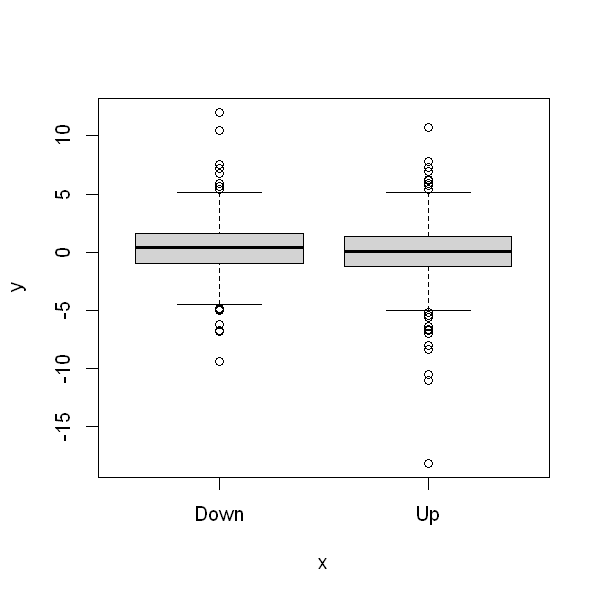

In [22]:
plot(Weekly$Direction, Weekly$Lag1 )
options(repr.plot.width=6, repr.plot.height=4)

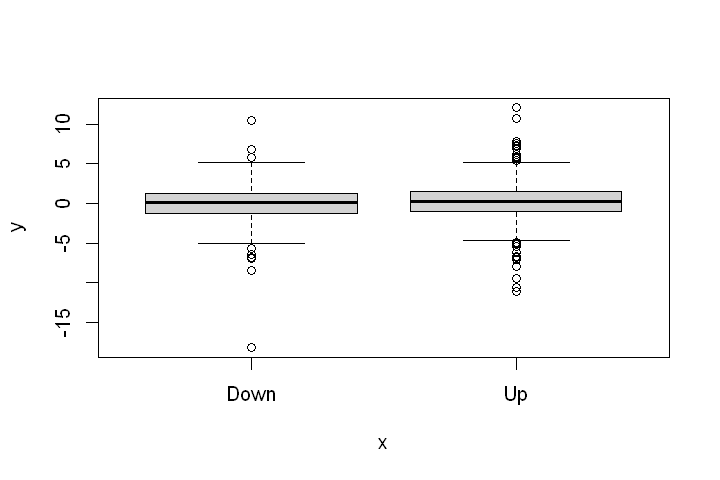

In [23]:
plot(Weekly$Direction, Weekly$Lag2 )
options(repr.plot.width=6, repr.plot.height=4)

In [5]:
cor(Weekly[,2:6])

,Lag1,Lag2,Lag3,Lag4,Lag5
Lag1,1.000000000,-0.07485305,0.05863568,-0.07127388,-0.008183096
Lag2,-0.074853051,1.00000000,-0.07572091,0.05838153,-0.072499482
Lag3,0.058635682,-0.07572091,1.00000000,-0.07539587,0.060657175
Lag4,-0.071273876,0.05838153,-0.07539587,1.00000000,-0.075675027
Lag5,-0.008183096,-0.07249948,0.06065717,-0.07567503,1.000000000


##### 2) Using all data (no training data and test data separation) perform a logistic regression with Direction as the response and the five Lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [6]:
glm.fit = glm(Direction ~ Lag1+Lag2+Lag3+Lag4+Lag5+Volume, data=Weekly, family=binomial  )
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


#### **3) Using your logistic regression result, you can compute the posterior probability p(x) = P(Y = 1jX = x) using predict(Obj, Data, type="response"), where Y is Direction. Also you can confirm the label corresponding to Y = 1 by examining the result of the glm output (try names(glm.fit)). What is your Y = 1, Down or Up ? Can you change the label corresponding to Y = 0 (which is called the level of reference) ?**

In [7]:
names(glm.fit)

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

In [8]:
glm.pred <- predict(glm.fit, type="response" )
head(data.frame( pred=c(glm.pred), Y=c(ifelse(glm.pred > 0.5,1,0))))

,pred,Y
,<dbl>,<dbl>
1,0.6086249,1
2,0.6010314,1
3,0.5875699,1
4,0.4816416,0
5,0.6169013,1
6,0.5684190,1


#### **4) Plot histogram of the Lag2's with Direction==Up and the Lag2's with Direction==Down, separately.<br /> &nbsp;&nbsp;&nbsp; Find mean for each case.**

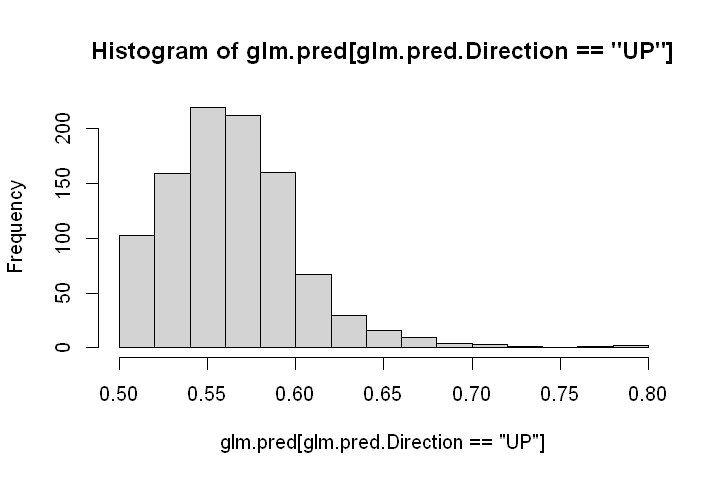

In [9]:
glm.pred.Direction <- ifelse(glm.pred > 0.5,"UP","Down")
hist(glm.pred[glm.pred.Direction=="UP"])
options(repr.plot.width=6, repr.plot.height=4)

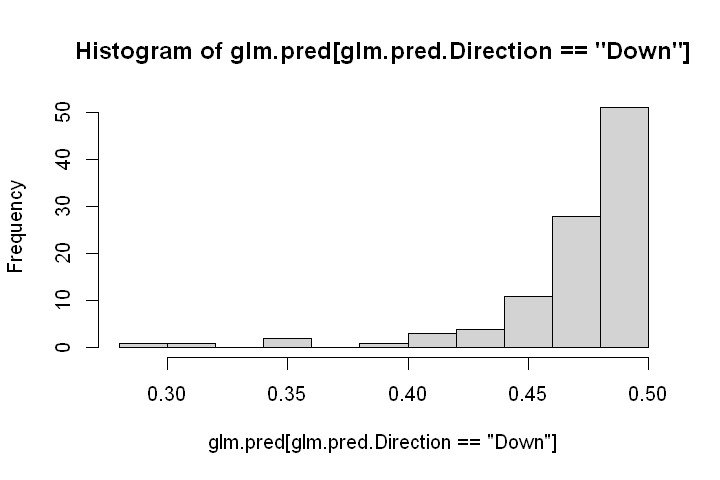

In [10]:
hist(glm.pred[glm.pred.Direction=="Down"], breaks=10)
options(repr.plot.width=6, repr.plot.height=4)

In [11]:
mean(glm.pred[ glm.pred.Direction =='UP']) #UP

[1] 0.5644151

In [12]:
mean(glm.pred[ glm.pred.Direction =='Down']) #Down

[1] 0.469826

In [13]:
comp=data.frame(real=Weekly$Direction, glm.y=glm.fit$y, pred.prob=c(glm.pred), conv.pred=c(glm.pred.Direction))
head(comp)

,real,glm.y,pred.prob,conv.pred
,<fct>,<dbl>,<dbl>,<chr>
1,Down,0,0.6086249,UP
2,Down,0,0.6010314,UP
3,Up,1,0.5875699,UP
4,Up,1,0.4816416,Down
5,Up,1,0.6169013,UP
6,Down,0,0.5684190,UP


#### **5) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor.<br /><br /> Based on the posterior probability from the glm result, determine your predicted Direction for the test data, that is, Lag2 from 2009 to 2010. <br /><br />Generate confusion matrix and the overall fraction of correct predictions for the test data (that is, the data from 2009 and 2010). Plot ROC curve and compute AUC.**

In [14]:
train=(Weekly$Year<2008)
glm.fit=glm(Direction~Lag2, data=Weekly[train,], family="binomial")
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag2, family = "binomial", data = Weekly[train, 
    ])

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.395  -1.274   1.028   1.082   1.305  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22658    0.06621   3.422 0.000621 ***
Lag2         0.04716    0.03230   1.460 0.144293    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1280.6  on 932  degrees of freedom
Residual deviance: 1278.5  on 931  degrees of freedom
AIC: 1282.5

Number of Fisher Scoring iterations: 4


In [15]:
Direction.2009 <- Weekly$Direction[!train]
Weekly.2009 <- Weekly[!train,]
summary(Direction.2009)

Down   Up 
  72   84

In [16]:
glm.pred = predict(glm.fit, Weekly.2009, type="response")

In [17]:
glm.pred.Direction <- ifelse(glm.pred > 0.5,"Up","Down")
table(glm.pred.Direction, Direction.2009)

                  Direction.2009
glm.pred.Direction Down Up
              Down    7  5
              Up     65 79

In [18]:
sum(glm.pred.Direction == Direction.2009)
mean( glm.pred.Direction == Direction.2009 )

[1] 86

[1] 0.5512821

In [24]:
library(caret)
confusionMatrix(as.factor(glm.pred.Direction), Direction.2009)

Confusion Matrix and Statistics

          Reference
Prediction Down Up
      Down    7  5
      Up     65 79
                                          
               Accuracy : 0.5513          
                 95% CI : (0.4697, 0.6309)
    No Information Rate : 0.5385          
    P-Value [Acc > NIR] : 0.4056          
                                          
                  Kappa : 0.0401          
                                          
 Mcnemar's Test P-Value : 1.766e-12       
                                          
            Sensitivity : 0.09722         
            Specificity : 0.94048         
         Pos Pred Value : 0.58333         
         Neg Pred Value : 0.54861         
             Prevalence : 0.46154         
         Detection Rate : 0.04487         
   Detection Prevalence : 0.07692         
      Balanced Accuracy : 0.51885         
                                          
       'Positive' Class : Down            
                              

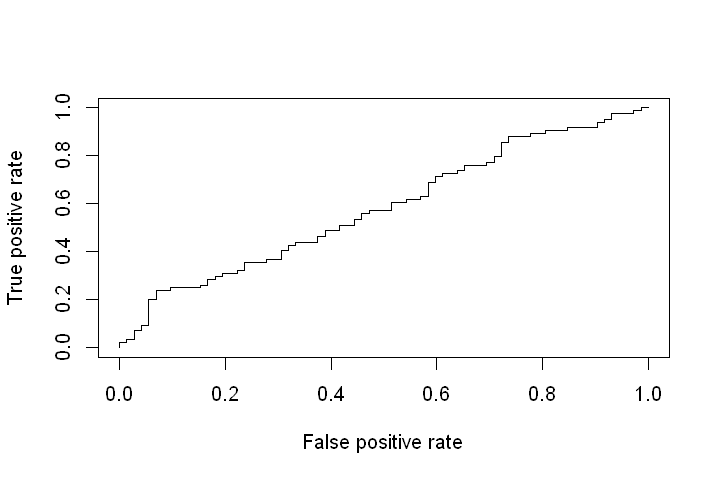

In [20]:
library(ROCR)
pred<-prediction(glm.pred, Direction.2009)
roc<-performance(pred, measure='tpr', x.measure = 'fpr')
plot(roc)
options(repr.plot.width=5, repr.plot.height=5)

In [21]:
auc<-performance(pred, measure="auc")
auc@y.values[1]

[[1]]
[1] 0.5825066